In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install indic-nlp-library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Projects/Emoji_Sentiment_Analysis/Dataset/Tamil_Emotion_tweets.xlsx"
data = pd.read_excel(file_path)

# Explore the dataset
data.head()

,Label,Emotion Set,Tweets
0,Misclassified,Anger,"""அவன் கம்ப்யூட்டர் இன்ஜினியருங்க. அவன் கேட்கறத..."
1,Misclassified,Anger,"""கோவம் வந்தா கோழி P யில கை வைக்கனுமாம் "" 😄😄 ஐய..."
2,Misclassified,Anger,"""பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு..."
3,Misclassified,Anger,# குசு பான்ஸ் மன குமுறல்.இவனுக்கு ரசிகனாக இருப...
4,Misclassified,Anger,"#1319 ""தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர்..."


In [ ]:
# Define a mapping from emotions to sentiments
emotion_to_sentiment = {
    'Anger': 'Negative',
    'Disgust': 'Negative',
    'Fear': 'Neutral',
    'Happy': 'Positive',
    'Sadness': 'Negative',
    'Surprise': 'Neutral'
}

# Map emotions to sentiments
data['Sentiment'] = data['Emotion Set'].map(emotion_to_sentiment)

# Explore the dataset with mapped sentiments
print(data[['Emotion Set', 'Sentiment']].head(20))


   Emotion Set Sentiment
0        Anger  Negative
1        Anger  Negative
2        Anger  Negative
3        Anger  Negative
4        Anger  Negative
5        Anger  Negative
6        Anger  Negative
7        Anger  Negative
8        Anger  Negative
9        Anger  Negative
10       Anger  Negative
11       Anger  Negative
12       Anger  Negative
13       Anger  Negative
14       Anger  Negative
15       Anger  Negative
16       Anger  Negative
17       Anger  Negative
18       Anger  Negative
19       Anger  Negative


In [ ]:
data.head()

,Label,Emotion Set,Tweets,Sentiment
0,Misclassified,Anger,"""அவன் கம்ப்யூட்டர் இன்ஜினியருங்க. அவன் கேட்கறத...",Negative
1,Misclassified,Anger,"""கோவம் வந்தா கோழி P யில கை வைக்கனுமாம் "" 😄😄 ஐய...",Negative
2,Misclassified,Anger,"""பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு...",Negative
3,Misclassified,Anger,# குசு பான்ஸ் மன குமுறல்.இவனுக்கு ரசிகனாக இருப...,Negative
4,Misclassified,Anger,"#1319 ""தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர்...",Negative


In [ ]:
data.columns

Index(['Label', 'Emotion Set', 'Tweets', 'Sentiment'], dtype='object')

In [ ]:
import re

# Function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\u0B80-\u0BFF\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
data['Cleaned_Text'] = data['Tweets'].apply(clean_text)


In [ ]:

# Display cleaned text
data[['Tweets', 'Cleaned_Text']].head(10)

,Tweets,Cleaned_Text
0,"""அவன் கம்ப்யூட்டர் இன்ஜினியருங்க. அவன் கேட்கறத...",அவன் கம்ப்யூட்டர் இன்ஜினியருங்க அவன் கேட்கறதுக...
1,"""கோவம் வந்தா கோழி P யில கை வைக்கனுமாம் "" 😄😄 ஐய...",கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க
2,"""பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு...",பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு ...
3,# குசு பான்ஸ் மன குமுறல்.இவனுக்கு ரசிகனாக இருப...,குசு பான்ஸ் மன குமுறல்இவனுக்கு ரசிகனாக இருப்பத...
4,"#1319 ""தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர்...",தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர் இந்நீர...
5,*ஆண்டாள்🙏 பற்றிய சர்ச்சை பேச்சுக்கு🗣 வருத்தம் ...,ஆண்டாள் பற்றிய சர்ச்சை பேச்சுக்கு வருத்தம் தெர...
6,*கடலில் தவறி விழுந்து பாம்பன் மீனவர் பலி* நடுக...,கடலில் தவறி விழுந்து பாம்பன் மீனவர் பலி நடுக்க...
7,*🌹ஒதுக்கப்படுவதை* *நன்கு அறிந்தும்* *ஒட்டிக்கொ...,ஒதுக்கப்படுவதை நன்கு அறிந்தும் ஒட்டிக்கொண்டு வ...
8,",😂😂அதான் எனக்கு வேணும்...யார சொன்னா இவனுகளுக்க...",அதான் எனக்கு வேணும்யார சொன்னா இவனுகளுக்கு கோவம...
9,. அச்சச்சோ அவாக்களுக்குலாம் ஆத்திரம் வந்திருச்...,அச்சச்சோ அவாக்களுக்குலாம் ஆத்திரம் வந்திருச்சூ...


In [ ]:
from indicnlp.tokenize import indic_tokenize

# Function to tokenize Tamil text
def tokenize_tamil(text):
    tokens = []
    for token in indic_tokenize.trivial_tokenize(text):
        tokens.append(token)
    return tokens

# Apply tokenization
data['Tokenized_Text'] = data['Cleaned_Text'].apply(tokenize_tamil)

# Display tokenized text
print(data[['Cleaned_Text', 'Tokenized_Text']].head(10))


                                        Cleaned_Text  \
0  அவன் கம்ப்யூட்டர் இன்ஜினியருங்க அவன் கேட்கறதுக...   
1  கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க   
2  பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு ...   
3  குசு பான்ஸ் மன குமுறல்இவனுக்கு ரசிகனாக இருப்பத...   
4  தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர் இந்நீர...   
5  ஆண்டாள் பற்றிய சர்ச்சை பேச்சுக்கு வருத்தம் தெர...   
6  கடலில் தவறி விழுந்து பாம்பன் மீனவர் பலி நடுக்க...   
7  ஒதுக்கப்படுவதை நன்கு அறிந்தும் ஒட்டிக்கொண்டு வ...   
8  அதான் எனக்கு வேணும்யார சொன்னா இவனுகளுக்கு கோவம...   
9  அச்சச்சோ அவாக்களுக்குலாம் ஆத்திரம் வந்திருச்சூ...   

                                      Tokenized_Text  
0  [அவன், கம்ப்யூட்டர், இன்ஜினியருங்க, அவன், கேட்...  
1  [கோவம், வந்தா, கோழி, யில, கை, வைக்கனுமாம், ஐயா...  
2  [பஸ்ஸுக்குள்ளே, ஃபோன், பேசி, எல்லாரையும், தொந்...  
3  [குசு, பான்ஸ், மன, குமுறல்இவனுக்கு, ரசிகனாக, இ...  
4  [தன்னை, உணர்த்தினும், காயும், பிறர்க்குநீர், இ...  
5  [ஆண்டாள், பற்றிய, சர்ச்சை, பேச்சுக்கு, வருத்தம... 

In [ ]:
# Function to remove stopwords
def remove_stopwords(text, stopwords):
    tokens_without_stopwords = [word for word in text if word not in stopwords]
    return tokens_without_stopwords

# Load stopwords
stopwords_file_path = "/content/drive/MyDrive/Projects/Emoji_Sentiment_Analysis/Dataset/TamilStopWords.txt"
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

# Apply stopwords removal
data['Text_without_Stopwords'] = data['Tokenized_Text'].apply(lambda x: remove_stopwords(x, stopwords))

# Display text without stopwords
print(data[['Tokenized_Text', 'Text_without_Stopwords']].head(10))


                                      Tokenized_Text  \
0  [அவன், கம்ப்யூட்டர், இன்ஜினியருங்க, அவன், கேட்...   
1  [கோவம், வந்தா, கோழி, யில, கை, வைக்கனுமாம், ஐயா...   
2  [பஸ்ஸுக்குள்ளே, ஃபோன், பேசி, எல்லாரையும், தொந்...   
3  [குசு, பான்ஸ், மன, குமுறல்இவனுக்கு, ரசிகனாக, இ...   
4  [தன்னை, உணர்த்தினும், காயும், பிறர்க்குநீர், இ...   
5  [ஆண்டாள், பற்றிய, சர்ச்சை, பேச்சுக்கு, வருத்தம...   
6  [கடலில், தவறி, விழுந்து, பாம்பன், மீனவர், பலி,...   
7  [ஒதுக்கப்படுவதை, நன்கு, அறிந்தும், ஒட்டிக்கொண்...   
8  [அதான், எனக்கு, வேணும்யார, சொன்னா, இவனுகளுக்கு...   
9  [அச்சச்சோ, அவாக்களுக்குலாம், ஆத்திரம், வந்திரு...   

                              Text_without_Stopwords  
0  [கம்ப்யூட்டர், இன்ஜினியருங்க, கேட்கறதுக்கு, பத...  
1  [கோவம், வந்தா, கோழி, யில, கை, வைக்கனுமாம், ஐயா...  
2  [பஸ்ஸுக்குள்ளே, ஃபோன், பேசி, எல்லாரையும், தொந்...  
3  [குசு, பான்ஸ், மன, குமுறல்இவனுக்கு, ரசிகனாக, இ...  
4  [தன்னை, உணர்த்தினும், காயும், பிறர்க்குநீர், இ...  
5  [ஆண்டாள், சர்ச்சை, பேச்சுக்கு, வருத்தம், தெரிவ... 

In [ ]:
import re
import emoji

# Function to retrieve emojis from the text
def retrieve_emojis(text):
    emojis_list = re.findall(r'\:(.*?)\:', emoji.demojize(text))
    return emojis_list

# Apply emoji retrieval
data['Emojis'] = data['Tweets'].apply(retrieve_emojis)

# Display tweets along with extracted emojis
data[['Tweets', 'Emojis']].head(10)


,Tweets,Emojis
0,"""அவன் கம்ப்யூட்டர் இன்ஜினியருங்க. அவன் கேட்கறத...",[]
1,"""கோவம் வந்தா கோழி P யில கை வைக்கனுமாம் "" 😄😄 ஐய...","[grinning_face_with_smiling_eyes, grinning_fac..."
2,"""பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு...",[]
3,# குசு பான்ஸ் மன குமுறல்.இவனுக்கு ரசிகனாக இருப...,[loudly_crying_face]
4,"#1319 ""தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர்...","[face_with_tears_of_joy, face_with_tears_of_joy]"
5,*ஆண்டாள்🙏 பற்றிய சர்ச்சை பேச்சுக்கு🗣 வருத்தம் ...,"[folded_hands, speaking_head, writing_hand]"
6,*கடலில் தவறி விழுந்து பாம்பன் மீனவர் பலி* நடுக...,[]
7,*🌹ஒதுக்கப்படுவதை* *நன்கு அறிந்தும்* *ஒட்டிக்கொ...,"[rose, rose, red_heart]"
8,",😂😂அதான் எனக்கு வேணும்...யார சொன்னா இவனுகளுக்க...","[face_with_tears_of_joy, face_with_tears_of_joy]"
9,. அச்சச்சோ அவாக்களுக்குலாம் ஆத்திரம் வந்திருச்...,[]


In [ ]:
data.columns

Index(['Label', 'Emotion Set', 'Tweets', 'Sentiment', 'Cleaned_Text',
       'Tokenized_Text', 'Text_without_Stopwords', 'Emojis'],
      dtype='object')

In [ ]:
data.head(20)

,Label,Emotion Set,Tweets,Sentiment,Cleaned_Text,Tokenized_Text,Text_without_Stopwords,Emojis
0,Misclassified,Anger,"""அவன் கம்ப்யூட்டர் இன்ஜினியருங்க. அவன் கேட்கறத...",Negative,அவன் கம்ப்யூட்டர் இன்ஜினியருங்க அவன் கேட்கறதுக...,"[அவன், கம்ப்யூட்டர், இன்ஜினியருங்க, அவன், கேட்...","[கம்ப்யூட்டர், இன்ஜினியருங்க, கேட்கறதுக்கு, பத...",[]
1,Misclassified,Anger,"""கோவம் வந்தா கோழி P யில கை வைக்கனுமாம் "" 😄😄 ஐய...",Negative,கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க,"[கோவம், வந்தா, கோழி, யில, கை, வைக்கனுமாம், ஐயா...","[கோவம், வந்தா, கோழி, யில, கை, வைக்கனுமாம், ஐயா...","[grinning_face_with_smiling_eyes, grinning_fac..."
2,Misclassified,Anger,"""பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு...",Negative,பஸ்ஸுக்குள்ளே ஃபோன் பேசி எல்லாரையும் தொந்தரவு ...,"[பஸ்ஸுக்குள்ளே, ஃபோன், பேசி, எல்லாரையும், தொந்...","[பஸ்ஸுக்குள்ளே, ஃபோன், பேசி, எல்லாரையும், தொந்...",[]
3,Misclassified,Anger,# குசு பான்ஸ் மன குமுறல்.இவனுக்கு ரசிகனாக இருப...,Negative,குசு பான்ஸ் மன குமுறல்இவனுக்கு ரசிகனாக இருப்பத...,"[குசு, பான்ஸ், மன, குமுறல்இவனுக்கு, ரசிகனாக, இ...","[குசு, பான்ஸ், மன, குமுறல்இவனுக்கு, ரசிகனாக, இ...",[loudly_crying_face]
4,Misclassified,Anger,"#1319 ""தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர்...",Negative,தன்னை உணர்த்தினும் காயும் பிறர்க்குநீர் இந்நீர...,"[தன்னை, உணர்த்தினும், காயும், பிறர்க்குநீர், இ...","[தன்னை, உணர்த்தினும், காயும், பிறர்க்குநீர், இ...","[face_with_tears_of_joy, face_with_tears_of_joy]"
5,Misclassified,Anger,*ஆண்டாள்🙏 பற்றிய சர்ச்சை பேச்சுக்கு🗣 வருத்தம் ...,Negative,ஆண்டாள் பற்றிய சர்ச்சை பேச்சுக்கு வருத்தம் தெர...,"[ஆண்டாள், பற்றிய, சர்ச்சை, பேச்சுக்கு, வருத்தம...","[ஆண்டாள், சர்ச்சை, பேச்சுக்கு, வருத்தம், தெரிவ...","[folded_hands, speaking_head, writing_hand]"
6,Misclassified,Anger,*கடலில் தவறி விழுந்து பாம்பன் மீனவர் பலி* நடுக...,Negative,கடலில் தவறி விழுந்து பாம்பன் மீனவர் பலி நடுக்க...,"[கடலில், தவறி, விழுந்து, பாம்பன், மீனவர், பலி,...","[கடலில், தவறி, விழுந்து, பாம்பன், மீனவர், பலி,...",[]
7,Misclassified,Anger,*🌹ஒதுக்கப்படுவதை* *நன்கு அறிந்தும்* *ஒட்டிக்கொ...,Negative,ஒதுக்கப்படுவதை நன்கு அறிந்தும் ஒட்டிக்கொண்டு வ...,"[ஒதுக்கப்படுவதை, நன்கு, அறிந்தும், ஒட்டிக்கொண்...","[ஒதுக்கப்படுவதை, நன்கு, அறிந்தும், ஒட்டிக்கொண்...","[rose, rose, red_heart]"
8,Misclassified,Anger,",😂😂அதான் எனக்கு வேணும்...யார சொன்னா இவனுகளுக்க...",Negative,அதான் எனக்கு வேணும்யார சொன்னா இவனுகளுக்கு கோவம...,"[அதான், எனக்கு, வேணும்யார, சொன்னா, இவனுகளுக்கு...","[அதான், வேணும்யார, சொன்னா, இவனுகளுக்கு, கோவம்,...","[face_with_tears_of_joy, face_with_tears_of_joy]"
9,Misclassified,Anger,. அச்சச்சோ அவாக்களுக்குலாம் ஆத்திரம் வந்திருச்...,Negative,அச்சச்சோ அவாக்களுக்குலாம் ஆத்திரம் வந்திருச்சூ...,"[அச்சச்சோ, அவாக்களுக்குலாம், ஆத்திரம், வந்திரு...","[அச்சச்சோ, அவாக்களுக்குலாம், ஆத்திரம், வந்திரு...",[]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer for Bag-of-Words encoding
count_vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
X_bow = count_vectorizer.fit_transform(data['Cleaned_Text'])

# Initialize TfidfVectorizer for TF-IDF encoding
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(data['Cleaned_Text'])

# Display the shape of the encoded features
print("Shape of Bag-of-Words encoded features:", X_bow.shape)
print("Shape of TF-IDF encoded features:", X_tfidf.shape)


Shape of Bag-of-Words encoded features: (1027, 1073)
Shape of TF-IDF encoded features: (1027, 1073)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for both encoded features (Bag-of-Words and TF-IDF)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, data['Sentiment'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, data['Sentiment'], test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of training set (Bag-of-Words):", X_train_bow.shape)
print("Shape of testing set (Bag-of-Words):", X_test_bow.shape)
print("Shape of training set (TF-IDF):", X_train_tfidf.shape)
print("Shape of testing set (TF-IDF):", X_test_tfidf.shape)


Shape of training set (Bag-of-Words): (821, 1073)
Shape of testing set (Bag-of-Words): (206, 1073)
Shape of training set (TF-IDF): (821, 1073)
Shape of testing set (TF-IDF): (206, 1073)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels (sentiments)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['Sentiment'])

print("Encoded Labels:", encoded_labels)


Encoded Labels: [0 0 0 ... 1 1 1]


In [ ]:
print("Tokenized Text Example:", data['Tokenized_Text'].iloc[0])

Tokenized Text Example: ['அவன்', 'கம்ப்யூட்டர்', 'இன்ஜினியருங்க', 'அவன்', 'கேட்கறதுக்கு', 'பதில்', 'சொல்லுங்க', 'என்று', 'கேபிள்காரரிடம்', 'கோபப்பட்ட', 'போது', 'அப்பாவின்', 'கண்களில்', 'மிளிர்ந்தது', 'படிக்க', 'வைத்த', 'பெருமை']


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Cleaned_Text'])  # Fit tokenizer on cleaned text

# Convert tokenized text to numerical sequences
numerical_sequences = tokenizer.texts_to_sequences(data['Cleaned_Text'])

# Pad sequences to ensure uniform length
max_sequence_length = 100
padded_sequences = pad_sequences(numerical_sequences, maxlen=max_sequence_length)

print("Numerical Sequence Example:", numerical_sequences[0])
print("Padded Sequence Example:", padded_sequences[0])


Numerical Sequence Example: [102, 1654, 1655, 102, 1656, 80, 412, 5, 1657, 1658, 30, 1659, 1660, 1661, 270, 130, 413]
Padded Sequence Example: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  102
 1654 1655  102 1656   80  412    5 1657 1658   30 1659 1660 1661  270
  130  413]


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
max_sequence_length = padded_sequences.shape[1]  # Maximum sequence length after padding


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length))
lstm_model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(lstm_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          752500    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 794805 (3.03 MB)
Trainable params: 794805 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Train the LSTM model
history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
13/13 [==============================] - 14s 590ms/step - loss: 0.6459 - accuracy: 0.3581 - val_loss: 0.5608 - val_accuracy: 0.3544
Epoch 2/50
13/13 [==============================] - 7s 582ms/step - loss: 0.5321 - accuracy: 0.3484 - val_loss: 0.5541 - val_accuracy: 0.3544
Epoch 3/50
13/13 [==============================] - 7s 500ms/step - loss: 0.3838 - accuracy: 0.4884 - val_loss: 0.5539 - val_accuracy: 0.4126
Epoch 4/50
13/13 [==============================] - 8s 612ms/step - loss: 0.0988 - accuracy: 0.6236 - val_loss: 0.4230 - val_accuracy: 0.4660
Epoch 5/50
13/13 [==============================] - 6s 441ms/step - loss: -0.5567 - accuracy: 0.7150 - val_loss: 0.1900 - val_accuracy: 0.5388
Epoch 6/50
13/13 [==============================] - 7s 554ms/step - loss: -1.2683 - accuracy: 0.7820 - val_loss: -0.2546 - val_accuracy: 0.5631
Epoch 7/50
13/13 [==============================] - 6s 435ms/step - loss: -1.7927 - accuracy: 0.7966 - val_loss: -0.1762 - val_accuracy: 0.4951


In [ ]:
# Save the model
lstm_model.save("/content/Tamil_lstm_model.h5")


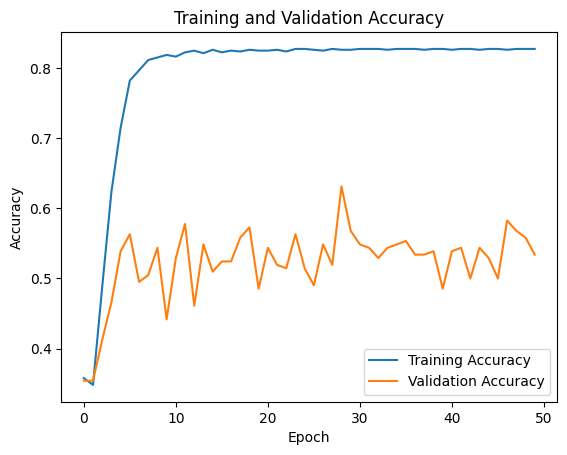

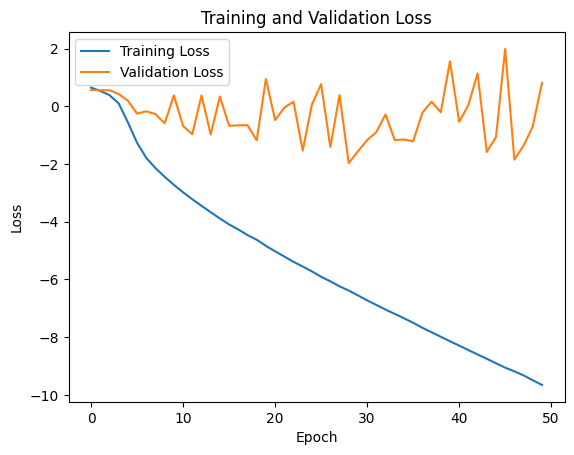

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predicted probabilities to binary labels
y_pred_binary = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Convert multiclass labels to binary labels
y_test_binary = (y_test == 1).astype("int32")  # Assuming class 1 represents positive sentiment

# Calculate evaluation metrics
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
recall = recall_score(y_test_binary, y_pred_binary, average='binary')
f1 = f1_score(y_test_binary, y_pred_binary, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


7/7 [==============================] - 1s 88ms/step
Precision: 0.43209876543209874
Recall: 0.958904109589041
F1-score: 0.5957446808510638


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[41 92]
 [ 3 70]]


In [ ]:
import numpy as np

print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred_binary))


Unique values in y_test: [0 1 2]
Unique values in y_pred: [0 1]


In [ ]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred_binary:", np.unique(y_pred_binary))


Unique values in y_test: [0 1 2]
Unique values in y_pred_binary: [0 1]


In [ ]:
import pandas as pd
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re

# Load the dataset
file_path = "/content/drive/MyDrive/Projects/Emoji_Sentiment_Analysis/Dataset/Tamil_Emotion_tweets.xlsx"
data = pd.read_excel(file_path)

# Sample new text data with emojis
new_text_data = [
    "இந்த புத்தகம் பொறியியல் பற்றிய மிகச் சுருக்கமான விபரங்களை அளித்துள்ளது. 😊",
    "இது எப்போதும் எனக்கு மிகவும் பிடிக்கும் படிக்கும் புத்தகம். 😞",
    "கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க",
    "ஒதுக்கப்படுவதை நன்கு அறிந்தும் ஒட்டிக்கொண்டு வாழ்வதை விட அவமானம் எதுவாக இருக்கப்போகிறதுகண்டுகொள்ளப்படாத வயோதிகம் 😞"
]

# Preprocess the new data
def clean_text(text):
    # Remove emojis
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', '', text)
    return text

cleaned_new_text_data = [clean_text(text) for text in new_text_data]

# Load the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Tweets'])

# Tokenize and pad sequences for the new text data
max_sequence_length = 100  # Assuming maximum sequence length
new_sequences = tokenizer.texts_to_sequences(cleaned_new_text_data)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Load the trained LSTM model
model_path = "/content/Tamil_lstm_model.h5"
loaded_model = load_model(model_path)

# Predict sentiment on the new data
new_predicted_probabilities = loaded_model.predict(new_padded_sequences)

# Set the prediction threshold
threshold = 0.5

# Convert predicted probabilities to binary sentiment labels using the adjusted threshold
new_predicted_labels = (new_predicted_probabilities > threshold).astype("int32")

# Define a mapping from binary labels to sentiment categories
sentiment_mapping = {0: "Negative", 1: "Positive"}

# Map binary labels to sentiment categories
sentiment_labels = [sentiment_mapping[label[0]] for label in new_predicted_labels]

# Display the predicted sentiment labels
for text, sentiment in zip(new_text_data, sentiment_labels):
    print("Text:", text)
    print("Predicted Sentiment:", sentiment)
    print()


1/1 [==============================] - 0s 483ms/step
Text: இந்த புத்தகம் பொறியியல் பற்றிய மிகச் சுருக்கமான விபரங்களை அளித்துள்ளது. 😊
Predicted Sentiment: Positive

Text: இது எப்போதும் எனக்கு மிகவும் பிடிக்கும் படிக்கும் புத்தகம். 😞
Predicted Sentiment: Positive

Text: கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க
Predicted Sentiment: Positive

Text: ஒதுக்கப்படுவதை நன்கு அறிந்தும் ஒட்டிக்கொண்டு வாழ்வதை விட அவமானம் எதுவாக இருக்கப்போகிறதுகண்டுகொள்ளப்படாத வயோதிகம் 😞
Predicted Sentiment: Negative



In [ ]:

# Sample Tamil text data
new_text_data = [
    "இந்த புத்தகம் பொறியியல் பற்றிய மிகச் சுருக்கமான விபரங்களை அளித்துள்ளது.",
    "இது எப்போதும் எனக்கு மிகவும் பிடிக்கும் படிக்கும் புத்தகம்.",
    "கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க",
    "ஒதுக்கப்படுவதை நன்கு அறிந்தும் ஒட்டிக்கொண்டு வாழ்வதை விட அவமானம் எதுவாக இருக்கப்போகிறதுகண்டுகொள்ளப்படாத வயோதிகம்"

]

# Perform preprocessing steps on 'new_text_data' similar to what you did for the training data
# For example, tokenize, pad sequences, etc.

# Then, use the loaded model to predict sentiment on the new data
# Replace 'new_padded_sequences' with your actual preprocessed data
new_padded_sequences = pad_sequences(tokenizer.texts_to_sequences(new_text_data), maxlen=max_sequence_length)

# Predict sentiment on the new data
new_predicted_probabilities = loaded_model.predict(new_padded_sequences)

# Convert predicted probabilities to binary sentiment labels
new_predicted_labels = (new_predicted_probabilities > 0.2).astype("int32")

# Display the predicted sentiment labels
print("Predicted Sentiment Labels:", new_predicted_labels)



1/1 [==============================] - 0s 79ms/step
Predicted Sentiment Labels: [[1]
 [1]
 [1]
 [0]]


In [ ]:
# Sample new data (Tamil language text with emojis)
new_text_data = ["இது மிகவும் மகிழ்ச்சியான நாள் ஆகும் 😊",
                 "கோவம் வந்தா கோழி யில கை வைக்கனுமாம் ஐயா சொல்றாங்க 😞",
                 "இது அதிக நாள் ஆகும் 😊",
                 "ஆண்டாள்🙏 பற்றிய சர்ச்சை பேச்சுக்கு🗣 வருத்தம் தெரிவித்த வைரமுத்து✍!*இந்துக்கள் மனம் புண்படும் வகையில் பேசியதாக"]

# Preprocess the new data
new_padded_sequences = pad_sequences(tokenizer.texts_to_sequences(new_text_data), maxlen=max_sequence_length)

# Predict sentiment on the new data
new_predicted_probabilities = loaded_model.predict(new_padded_sequences)

# Convert predicted probabilities to binary sentiment labels
new_predicted_labels = (new_predicted_probabilities > 0.5).astype("int32")

# Display the predicted sentiment labels
print("Predicted Sentiment Labels:", new_predicted_labels)


1/1 [==============================] - 0s 42ms/step
Predicted Sentiment Labels: [[1]
 [0]
 [1]
 [0]]
